In [29]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

x_ = datasets.load_iris().data#导入样本数据
y_ = datasets.load_iris().target#导入样本标签


In [30]:
datasets.load_iris().target_names#花名字

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [31]:
np.random.seed(160) 
np.random.shuffle(x_)
np.random.seed(160)
np.random.shuffle(y_)
#区分训练集和测试集
x_train,x_test,y_train,y_test=train_test_split(x_,y_,test_size=0.5,random_state=0)


In [32]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(75, 4)
(75,)
(75, 4)
(75,)


In [33]:
#运用knn算法，5是默认值
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [34]:
knn.predict(x_test)

array([0, 0, 1, 0, 1, 2, 2, 1, 1, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 1,
       1, 2, 2, 1, 2, 0, 2, 0, 0, 0, 2, 2, 1, 0, 2, 1, 0, 0, 2, 0, 1, 0,
       2, 2, 0, 2, 0, 1, 0, 2, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 1, 1, 2, 1, 1, 0, 1, 1])

In [35]:
y_test

array([0, 0, 1, 0, 2, 2, 1, 1, 1, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 1,
       1, 2, 2, 1, 2, 0, 2, 0, 0, 0, 2, 2, 1, 0, 2, 1, 0, 0, 2, 0, 1, 0,
       2, 2, 0, 2, 0, 1, 0, 2, 1, 1, 0, 0, 1, 1, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 1, 1, 2, 1, 1, 0, 1, 2])

In [36]:
knn.score(x_test,y_test)

0.9466666666666667

In [12]:
#随机生成数据
arr1 = np.random.randint(1,7,size =(150,4))
y = knn.predict(arr1)


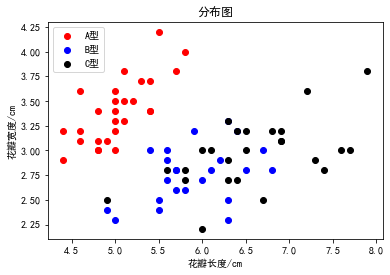

In [37]:
from sklearn import datasets
iris= datasets.load_iris()
X=iris.data
y=iris.target
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

plt.scatter(x_test[y_test==0,0],x_test[y_test==0,1],color='r',label='A型')
plt.scatter(x_test[y_test==1,0],x_test[y_test==1,1],color='b',label='B型')
plt.scatter(x_test[y_test==2,0],x_test[y_test==2,1],color='k',label='C型')

plt.legend()

plt.xlabel('花瓣长度/cm')
plt.ylabel('花瓣宽度/cm')

plt.title('分布图')

plt.show()



In [38]:
from sklearn.metrics import recall_score
recall_score(y_train,y_test,average='macro')#计算每个标签的指标，并找到其未加权平均值。这没有考虑标签不平衡。

0.3407836822329576

In [15]:
recall_score(y_train,y_test,average='micro')#通过计算正确，错误和否定的总数来全局计算指标

0.3466666666666667

In [16]:
#使用交叉验证发估计测试误差，因为在真实数据中，测试集是不知道y值，只能使用重抽样方法估计测试误差
from sklearn import model_selection as cv
scores = cv.cross_val_score(knn, x_train, y_train, cv =5) #这里用5折交叉验证法
score = scores.mean()  #scores是总的正确率，还要平均才行
score


1.0

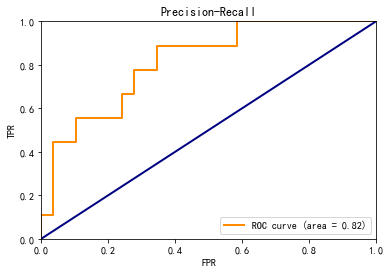

In [17]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from itertools import cycle
from sklearn.preprocessing import label_binarize #标签二值化LabelBinarizer，可以把yes和no转化为0和1，或是把incident和normal转化为0和1。
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
iris = datasets.load_iris()
# 鸢尾花数据导入
X = iris.data
#每一列代表了萼片或花瓣的长宽，一共4列，每一列代表某个被测量的鸢尾植物，iris.shape=(150,4)
y = iris.target
#target是一个数组，存储了data中每条记录属于哪一类鸢尾植物，所以数组的长度是150,所有不同值只有三个
random_state = np.random.RandomState(0)
#给定状态为0的随机数组
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]
 
n_samples, n_features = X.shape
X  = np.c_[X, random_state.randn(n_samples, 200 * n_features)]
#添加合并生成特征测试数据集
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=0)
#根据此模型训练简单数据分类器
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))#线性分类支持向量机
y_score = classifier.fit(X_train, y_train).decision_function(X_test)
#用一个分类器对应一个类别， 每个分类器都把其他全部的类别作为相反类别看待。
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    #计算ROC曲线面积
    roc_auc[i] = auc(fpr[i], tpr[i])
 
 
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
import matplotlib.pyplot as plt
 
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.legend(loc="lower right")
plt.title("Precision-Recall")
plt.show()

In [44]:
import numpy as np
# 加载莺尾花数据集
from sklearn import datasets
# 导入KNN分类器
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
# 导入莺尾花数据集
iris = datasets.load_iris()

X = iris.data
y = iris.target
# 得到训练集合和验证集合, 8: 2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = KNeighborsClassifier(n_neighbors=5, p=2, metric="minkowski")
clf.fit(X_train, y_train)
X_pred = clf.predict(X_test)
acc = sum(X_pred == y_test) / X_pred.shape[0]
print("预测的准确率ACC: %.3f" % acc)

预测的准确率ACC: 0.933


In [50]:
print(y_train)
y_test


[1 0 2 2 1 0 1 2 0 2 1 0 2 1 2 1 0 2 0 1 2 2 2 2 1 1 0 2 1 2 0 2 2 2 0 0 0
 1 0 2 1 0 1 1 0 1 0 1 1 1 2 0 1 0 2 1 2 1 1 1 0 2 1 1 0 1 1 1 0 2 1 0 1 2
 0 2 0 1 1 0 2 0 1 0 1 2 1 0 0 1 2 0 2 0 1 1 2 2 2 2 1 2 2 0 1 2 1 0 0 2 2
 2 0 1 0 0 2 0 0 0]


array([1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 1, 2,
       0, 0, 2, 0, 1, 2, 0, 0])

In [52]:
from sklearn.metrics import recall_score
recall_score(y_train[:30],y_test,average='macro')#计算每个标签的指标，并找到其未加权平均值。这没有考虑标签不平衡。

0.25677655677655675

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

In [24]:
n_neighbors = [1, 3, 5, 8, 10, 40]
# 设置图片大小
plt.figure(figsize=(10,20))
for i, k in enumerate(n_neighbors):
    # 默认使用加权平均进行计算predictor
    clf = KNeighborsRegressor(n_neighbors=k, p=2, metric="minkowski")
    # 训练
    clf.fit(X, y)
    # 预测
    y_ = clf.predict(T)
    plt.subplot(6, 1, i + 1)
    plt.scatter(X, y, color='red', label='data')
    plt.plot(T, y_, color='navy', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i)" % (k))

plt.tight_layout()
plt.show()

NameError: name 'T' is not defined

<Figure size 720x1440 with 0 Axes>

(1797, 64)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
0


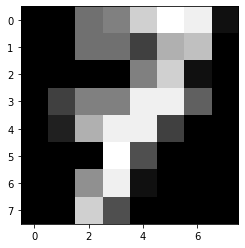

In [8]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits    # 注意加载数据的时候应该从数据集里面加载
import  matplotlib.pyplot as plt

# 加载数据
digits = load_digits()
data = digits.data
# 数据探索
print(data.shape)
# 查看第一幅图像
print(digits.images[0])
# 第一幅图像代表的数字含义:代表数字0
print(digits.target[0])
# 将第一幅图像显示出来
plt.gray()
plt.imshow(digits.images[7])
plt.show()